<FONT size="5.9pt"> **PROSPECTIVE CONSEQUENTIAL LCA OF BARK BIOREFINING**
</FONT> 

This jupyter notebook corresponds to the environmental prospective consequential LCA study of the bark fractionation porcess. The [*lca_algebraic*](https://link.springer.com/article/10.1007/s11367-021-01993-z) library was used to build the parameterised database. See below for more information:
- https://github.com/oie-mines-paristech/lca_algebraic/tree/master
- https://lca-algebraic.readthedocs.io/en/latest/api/lca.html

# Set-up the directories <a class="anchor" id="first-bullet"></a>

In [1]:
import os
from shutil import copyfile
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define the initial working directory
wdir = '/home/leabraud/Documents/LCAbark'
pdir = os.path.join(wdir,'projects')
print('Working directory:', wdir)

# set the BW project directory
pathlib.Path(pdir).mkdir(parents=True, exist_ok=True)
os.environ['BRIGHTWAY2_DIR'] = pdir
print('Project directory:', os.environ['BRIGHTWAY2_DIR'])

# set the directory to store the results
result_dir = os.path.join(wdir,'results')   
pathlib.Path(result_dir).mkdir(parents=True, exist_ok=True)
print('Results directory:', result_dir)

# set the directory in which the databases are stored
db_dir = '/home/leabraud/Desktop/databases'
print('Database directory:', db_dir)

Working directory: /home/leabraud/Documents/LCAbark
Project directory: /home/leabraud/Documents/LCAbark/projects
Results directory: /home/leabraud/Documents/LCAbark/results
Database directory: /home/leabraud/Desktop/databases


# Import background databases <a class="anchor" id="second-bullet"></a>

The background databases corresponds to ecoinvent 3.9 consequential and biosphere3. Several versions of the ecoinvent database were generated using [*premise*](https://www.sciencedirect.com/science/article/pii/S136403212200226X) (see jupyter notebook 1). 

In [3]:
import lca_algebraic as alg
import brightway2 as bw

Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCAbark/projects


In [4]:
# initiate the project / choose project name
alg.initProject('lcabark')

Biosphere database already present!!! No setup is needed


/tmp/ipykernel_16728/4203055008.py:2: DeprecationWarning: DEPRECATED : Use bw2io.import_ecoinvent_release() instead
  alg.initProject('lcabark')


In [5]:
# import the ecoinvent database / change the version and directory
alg.importDb("consequential39", str(db_dir + '/ecoinvent 3.9_consequential_ecoSpold02/datasets'))

/tmp/ipykernel_16728/3201343320.py:2: DeprecationWarning: DEPRECATED : Use the new bw2io.import_ecoinvent_release instead
  alg.importDb("consequential39", str(db_dir + '/ecoinvent 3.9_consequential_ecoSpold02/datasets'))
[WARNING] Database 'consequential39' has already been imported 


In [6]:
# overview of the databases
alg.list_databases()

,backend,nb_activities,type
name,,,
biosphere3,sqlite,4709,biosphere
consequential39,sqlite,18856,background
ecoinvent_consequential_3.9_remind_SSP2-Base_2040,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-PkBudg1150_2045,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-PkBudg500_2045,sqlite,20741,background
ecoinvent_consequential_3.9_remind_SSP2-Base_2045,sqlite,20741,background
ecoinvent_consequential_3.9_image_SSP2-Base_2045,sqlite,21414,background
ecoinvent_consequential_3.9_remind_SSP1-PkBudg500_2045,sqlite,20741,background
Foreground DB,sqlite,62,foreground


# Create foreground databases <a class="anchor" id="third-bullet"></a>

In [7]:
USER_DB = 'Foreground DB'
alg.resetDb(USER_DB)
alg.resetParams()
#alg.list_databases()

[WARNING] Db Foreground DB was here. Reseting it


## Get ecoinvent datasets

In [8]:
# the calculations were performed using a prospective version of ecoinvent 
#ei = 'consequential39'
#ei = 'ecoinvent_consequential_3.9_remind_SSP2-Base_2045'
#ei = 'ecoinvent_consequential_3.9_image_SSP2-Base_2045'
ei = 'ecoinvent_consequential_3.9_remind_SSP2-PkBudg500_2045'
#ei = 'ecoinvent_consequential_3.9_remind_SSP1-PkBudg500_2045'

In [9]:
# technopshere flows
grid_SE = alg.findActivity(name='market for electricity, high voltage', loc = 'SE', db_name=ei) 
grid_RER = alg.findActivity(name='market group for electricity, high voltage', loc = 'RER', db_name=ei) 
ethylacetate = alg.findActivity(name='ethyl acetate production', loc = 'RER', db_name=ei) 
CO2 = alg.findActivity(name='carbon dioxide production, liquid', loc = 'RER', db_name=ei)
sodiumbicarbonate = alg.findActivity(name='market for sodium bicarbonate', loc = 'GLO', db_name=ei)
sodiumhydroxide = alg.findActivity(name='market for sodium hydroxide, without water, in 50% solution state', loc = 'GLO', db_name=ei)
quicklime = alg.findActivity(name='quicklime production, milled, loose', loc = 'CH', db_name=ei)
wwt = alg.findActivity(name='treatment of wastewater, average, wastewater treatment', loc = 'Europe without Switzerland', db_name=ei)
limestone = alg.findActivity(name='market for limestone residue', loc = 'CH', db_name=ei)
heatwoodchips = alg.findActivity(name='heat production, wood chips from industry, at furnace 50kW', loc = 'CH', db_name=ei)

# substituted products
talloil = alg.findActivity(name='tall oil refinery operation', loc = 'GLO', db_name=ei) 
potatostarch = alg.findActivity(name='potato starch production', loc = 'DE', db_name=ei) 
phenol = alg.findActivity(name='phenol production, from cumene', loc = 'RER', db_name=ei)
pulp = alg.findActivity(name='sulfate pulp production, from softwood, unbleached', loc = 'RER', db_name=ei)

# biosphere flows
ethylacetateemission = alg.findActivity(name='Ethyl acetate', db_name='biosphere3', categories = ('air',))
water = alg.findActivity(name='Water, river', db_name='biosphere3', categories = ('natural resource','in water'))
carbondioxide = alg.findActivity(name='Carbon dioxide, fossil', db_name='biosphere3', categories = ('air',))

## Modify the ecoinvent heat dataset

The heat dataset from ecoinvent is used to model the substituted heat from cogeneration using either wood chips or bark (see system diagram). 

In [10]:
heat = alg.findActivity(name='heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', loc = 'SE', db_name=ei)

### Case 1: No environmental burdens from bark production and no direct biogenic carbon emissions

The dataset for heat production from cogeneration using wood chips is scaled to the production of 1 MJ of heat. The electricity produced is substituted (negative value in the inventory). Producing 1 MJ of heat requires 0.117578 kg of wood chips i.e. the processing of 1 kg of wood chips generates 8.5 MJ. 

In this study, the environmental impacts associated with bark "production" are excluded since they would be the same for the two bioreifnery configurations (i.e., stand-alone and integrated). The input for "wood chips, wet, measured as dry mass" is removed. So, when scaling the dataset to 8.5 MJ, we only consider the impacts associated with the cogeneration process itself.

The dataset also accounts for direct emission of non-fossil CO2 to the atmosphere. 0.213 kg CO2-eq non-fossil are emitted in the process. According to the description of the dataset: "CO2 emissions were calculated out of the carbon content of the wood used as combustible. Carbon emitted in carbon monoxide was subtracted from the result." In the dataset, the carbon content of the wood chips is estimated at 0.4940 kg C/kg dry mass and the heating value reaches 10.84 MJ. In other words, 0.117578 kg of wood chips (required to produce 1 MJ of heat).

According to the carbon balance, the carbon content of bark was estimated at 0.49402 kg C/kg bark in this study, which is similar to the carbon content of wood chips considered in this study. So, the amount of non-fossil (=biogenic) CO2 emitted from the combustion of wood chips is the same as for bark. 

The direct emissions of biogenic carbon, in the form of CO2 or CO were removed from the combustion activity. They will be considered aside in the study. The input/output amounts for the following datasets were set to 0 (values scaled to 1 MJ):
- wood chips, wet, measured as dry mass 	market for wood chips, wet, measured as dry mass 	0.117578 	kilogram
- Carbon dioxide, non-fossil 	Carbon dioxide, non-fossil 	0.213333 	kilogram
- Carbon monoxide, non-fossil 	Carbon monoxide, non-fossil 	0.000222222 	kilogram

**The new dataset "heat_CHP_bark" only accounts for the impacts associated with the cogeneration process and exludes the impacts from wood production as well as the direct non-fossil emissions from wood. Since the properties of the wood chips and bark as similar, it was assumed that the combustion processes will results in the same impacts if using wood chips or bark as input.**

In [12]:
heat_CHP_bark = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)
heat_CHP_bark.deleteExchanges('market for wood chips, wet, measured as dry mass')#
#heat_CHP_bark.deleteExchanges('wood chips, wet, measured as dry mass') # for ecoinvent 3.9
heat_CHP_bark.deleteExchanges('Carbon dioxide, non-fossil')
heat_CHP_bark.deleteExchanges('Carbon monoxide, non-fossil')

[WARNING] Activity 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' was already in 'Foreground DB'. Overwriting it


In [ ]:
# check that the exchanges were correctly deleted
#alg.printAct(heat_CHP_bark)

### Case 2: Avoided burdens from producing heat using wood chips via cogeneration

The same original dataset from ecoinvent was used as a basis. Here, the objective is to model the heat production from wood chips process that will be avoided by producing heat from the residual biomass obtained from the bioreifnery processes. Lipophilic extraction, sugar extraction, and pulping generate residual biomass that is combusted to produce heat. The original process is not changed since we need to consider the impacts of using wood chips and combusting it. 

**The biogenic C02 and CO from the cogeneration processes are not removed for now. The original activity is simply copied and given a new name for distinction.**

In [13]:
heat_CHP_woodchips = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)

[WARNING] Activity 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' was already in 'Foreground DB'. Overwriting it


### Case 3: Burdens from producing heat using residual biomass from the biorefinery processes

Again, the same ecoinvent dataset it used as basis. Based on the carbon balance, the carbon content of the residual biomass (which is not the biomass that goes from one process to the other) obtained for each of the process varies. The lipophilic extraction, sugar extraction, and pulping processes generate to 34.456, 8.5, and 36.9 g of C to be combusted to roduce heat. In total, this corresponds to 79.856 g of C that goes into a cogeneration unit. 

In [14]:
C_RB_LE = 34.456 # g of C in the residual biomass from lipophilic extraction
C_RB_SE = 8.5 # g of C in the residual biomass from sugar extraction
C_RB_P = 36.9 # g of C in the residual biomass from pulping
total_C_CHP = C_RB_LE + C_RB_SE + C_RB_P
total_C_CHP

79.856

The inventory data for the three biorefinery processes accounts for these as MJ produced. The conversion is made based on the relation 1 kg dry mass => 8.5 MJ according to the ecoinvent dataset for heat from cogeneration using wood chips. 

**The same dataset as the one used for heat production from bark is used. No impacts from the biomass and no direct emissions are accounted for.**

In [15]:
heat_CHP_RB = alg.copyActivity(USER_DB, heat, code = 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014', withExchanges=True)
heat_CHP_RB.deleteExchanges('market for wood chips, wet, measured as dry mass')
#heat_CHP_RB.deleteExchanges('wood chips, wet, measured as dry mass') # ecoinvent 3.9
heat_CHP_RB.deleteExchanges('Carbon dioxide, non-fossil')
heat_CHP_RB.deleteExchanges('Carbon monoxide, non-fossil')

[WARNING] Activity 'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' was already in 'Foreground DB'. Overwriting it


# Create parameters

## Evaluate the influence of the geographical location

In the sensititvity analysis, the influence of the geographical location on the LCA results is analysed. There are no European market for heat production from cogeneration in ecoinvent 3.9 consequential. However, the dataset exists for many locations. The only differences between the datasets are the electricity mix and the municipal solid waste treatment. Here, both the electricity mix and the heat production processes are changed based on the geographical location.  

List of countries analysed in the sensitivity analysis: SE, NO, FI, DK, FR, DE, BE, LU, NL, AT.

In [16]:
# SE and RER have already been created above
grid_NO = alg.findActivity(name='market for electricity, high voltage', loc = 'NO', db_name=ei) 
grid_FI = alg.findActivity(name='market for electricity, high voltage', loc = 'FI', db_name=ei) 
grid_DK = alg.findActivity(name='market for electricity, high voltage', loc = 'DK', db_name=ei) 
grid_FR = alg.findActivity(name='market for electricity, high voltage', loc = 'FR', db_name=ei) 
grid_DE = alg.findActivity(name='market for electricity, high voltage', loc = 'DE', db_name=ei) 
grid_BE = alg.findActivity(name='market for electricity, high voltage', loc = 'BE', db_name=ei) 
grid_LU = alg.findActivity(name='market for electricity, high voltage', loc = 'LU', db_name=ei) 
grid_NL = alg.findActivity(name='market for electricity, high voltage', loc = 'NL', db_name=ei) 
grid_AT = alg.findActivity(name='market for electricity, high voltage', loc = 'AT', db_name=ei) 

mw_SE = alg.findActivity(name='market for municipal solid waste', loc = 'SE', db_name=ei) 
mw_NO = alg.findActivity(name='market for municipal solid waste', loc = 'NO', db_name=ei) 
mw_FI = alg.findActivity(name='market for municipal solid waste', loc = 'FI', db_name=ei) 
mw_DK = alg.findActivity(name='market for municipal solid waste', loc = 'DK', db_name=ei) 
mw_FR = alg.findActivity(name='market for municipal solid waste', loc = 'FR', db_name=ei) 
mw_DE = alg.findActivity(name='market for municipal solid waste', loc = 'DE', db_name=ei) 
mw_BE = alg.findActivity(name='market for municipal solid waste', loc = 'BE', db_name=ei) 
mw_LU = alg.findActivity(name='market for municipal solid waste', loc = 'LU', db_name=ei) 
mw_NL = alg.findActivity(name='market for municipal solid waste', loc = 'NL', db_name=ei) 
mw_AT = alg.findActivity(name='market for municipal solid waste', loc = 'AT', db_name=ei) 
mw_RER = alg.findActivity(name='market group for municipal solid waste', loc = 'RER', db_name=ei) 

In [17]:
# create the switch parameter for the source of electricity used in the bioreifnery: grid or recirculation
grid_loc = alg.newEnumParam(
    name = 'grid_loc',
    values = ['grid_SE','grid_NO','grid_FI','grid_DK','grid_FR','grid_DE','grid_BE','grid_LU','grid_NL','grid_AT','grid_RER'],
    default = 'grid_SE',
    #label = 'source of electricity - biorefinery',
    description = "Switch on the source of electricty used in the biorefinery",
    group = 'energy')

# create the virtual activity corresponding to the switch
grid_switch_act = alg.newSwitchAct(dbname = USER_DB,
                                   name = 'grid_switch_act',
                                   paramDef = grid_loc,
                                   acts_dict = {'grid_SE' : grid_SE,
                                                'grid_NO': grid_NO,
                                                'grid_FI': grid_FI,
                                                'grid_DK': grid_DK,
                                                'grid_FR': grid_FR,
                                                'grid_DE': grid_DE,
                                                'grid_BE': grid_BE,
                                                'grid_LU': grid_LU,
                                                'grid_NL': grid_NL,
                                                'grid_AT': grid_AT,
                                                'grid_RER': grid_RER})

In [18]:
mw_loc = alg.newEnumParam(
    name = 'mw_loc',
    values = ['mw_SE','mw_NO','mw_FI','mw_DK','mw_FR','mw_DE','mw_BE','mw_LU','mw_NL','mw_AT','mw_RER'],
    default = 'mw_SE',
    #label = 'source of electricity - biorefinery',
    description = "Switch on the source of electricty used in the biorefinery",
    group = 'waste')

# create the virtual activity corresponding to the switch
mw_switch_act = alg.newSwitchAct(dbname = USER_DB,
                                   name = 'mw_switch_act',
                                   paramDef = mw_loc,
                                   acts_dict = {'mw_SE': mw_SE,
                                                'mw_NO': mw_NO,
                                                'mw_FI': mw_FI,
                                                'mw_DK': mw_DK,
                                                'mw_FR': mw_FR,
                                                'mw_DE': mw_DE,
                                                'mw_BE': mw_BE,
                                                'mw_LU': mw_LU,
                                                'mw_NL': mw_NL,
                                                'mw_AT': mw_AT,
                                                'mw_RER': mw_RER})

## Evaluate the influence of the percentage of losses

The float parameter defined corresponds to the percentage of losses in the process. An increase in the percentage of losses means that less of the (co)products are produced but more heat is generated. 


In [19]:
percentage_losses = alg.newFloatParam(name = "percentage_losses",
                           default = 0, min = 0, max = 0.3, 
                           unit = '%',
                           group = 'biomass')

## Evaluate the influence of the integration of the bioreifnery with co-located source of energy

The boolean parameter defined changes the amount of electricity used in the biorefinery processes. In the integrated biorefinery (standalone = 0), no external electricity is required and all the energy is supplied from the co-located source which comes into the system free of burdens. In the standalone bioreifnery (standalone = 1), the electricity required is supplied by the grid. 

In [20]:
standalone = alg.newBoolParam('standalone', 
                               default = 1, # 1 means the biorefinery system is stand-alone, 0 it is integrated
                               group = 'booleans')

## Evaluate the influence of the lifespan of the biorefinery products

The float parameter defined corresponds to a percentage of increase or decrease of the lifespan of the products. This parameter affects the amount of non-fossil CO2 emitted from the EoL of the biorefinery products and calculated with the ALIGNED tool. 

In [21]:
lifespan = alg.newFloatParam(name = "lifespan",
                             default = 0, min = 0, max = 0.3,
                             unit = '%',
                             group = 'lifespan')

# Add the parameters to the foreground activities

## Create parameterised heat production processes

The amount of electricity and municipal solid wastes are not changed, only the geographical location of the datasets. 

In [22]:
heat_CHP_bark.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_bark.updateExchanges({'municipal*':mw_switch_act})

heat_CHP_woodchips.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_woodchips.updateExchanges({'municipal*':mw_switch_act})

heat_CHP_RB.updateExchanges({'electricity*':grid_switch_act})
heat_CHP_RB.updateExchanges({'municipal*':mw_switch_act})

In [ ]:
#alg.printAct(heat_CHP_bark)

## Create parameterised biorefinery processes

All the activities are scaled to the functional unit i.e. the processing of 1 kg of bark dry mass. 

In [23]:
lipophilic_extraction = alg.newActivity(db_name = USER_DB, 
         name = 'lipophilic extraction',
         unit = 'unit',
         exchanges={
             # technosphere inputs
             ethylacetate: 0.002,
             grid_SE: 2.44*standalone,
             # emissions
             ethylacetateemission: 0.002
         })

lipophilic_extraction.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(lipophilic_extraction)

lipophilic extraction (1.000000 unit)  \
                                                                     input   
Ethyl acetate                                                Ethyl acetate   
ethyl acetate production                     ethyl acetate production[RER]   
market for electricity, high voltage                   grid_switch_act{FG}   

                                                                      
                                               amount           unit  
Ethyl acetate                                   0.002       kilogram  
ethyl acetate production                        0.002       kilogram  
market for electricity, high voltage  2.44*standalone  kilowatt hour

In [24]:
sugar_extraction = alg.newActivity(db_name = USER_DB, 
 name = 'sugar extraction',
 unit = 'unit',
 exchanges={
     grid_SE: 5*standalone,
     wwt: -0.0002,
     # natural resources
     water: 0.0002
 })

sugar_extraction.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(sugar_extraction)

sugar extraction (1.000000 unit)  \
                                                                                                input   
Water, river                                                                             Water, river   
market for electricity, high voltage                                              grid_switch_act{FG}   
treatment of wastewater, average, wastewater tr...  treatment of wastewater, average, wastewater t...   

                                                                  \
                                                          amount   
Water, river                                              0.0002   
market for electricity, high voltage                5*standalone   
treatment of wastewater, average, wastewater tr...       -0.0002   

                                                                   
                                                             unit  
Water, river                                          cubic meter  
market for electricity, high voltage                kilowatt hour  
treatment of wastewater, average, wastewater tr...    cubic meter

In [25]:
pulping = alg.newActivity(db_name = USER_DB, 
 name = 'pulping',
 unit = 'unit',
 exchanges={
     sodiumhydroxide: 0.00523,
     quicklime: 0.00629, # calcium oxide
     wwt: -0.00035,
     grid_SE: 1.03*standalone,
     heatwoodchips:0.35,
     CO2: 0.124*standalone,
     limestone:-0.00551,
     # natural resources
     water: 0.00035
 })

pulping.updateExchanges({'electricity*':grid_switch_act})
alg.printAct(pulping)

pulping (1.000000 unit)  \
                                                                                                input   
Water, river                                                                             Water, river   
carbon dioxide production, liquid                              carbon dioxide production, liquid[RER]   
heat production, wood chips from industry, at f...  heat production, wood chips from industry, at ...   
market for electricity, high voltage                                              grid_switch_act{FG}   
market for limestone residue                                         market for limestone residue[CH]   
market for sodium hydroxide, without water, in ...  market for sodium hydroxide, without water, in...   
quicklime production, milled, loose                           quicklime production, milled, loose[CH]   
treatment of wastewater, average, wastewater tr...  treatment of wastewater, average, wastewater t...   

                                                                      \
                                                              amount   
Water, river                                                 0.00035   
carbon dioxide production, liquid                   0.124*standalone   
heat production, wood chips from industry, at f...              0.35   
market for electricity, high voltage                 1.03*standalone   
market for limestone residue                                -0.00551   
market for sodium hydroxide, without water, in ...           0.00523   
quicklime production, milled, loose                          0.00629   
treatment of wastewater, average, wastewater tr...          -0.00035   

                                                                   
                                                             unit  
Water, river                                          cubic meter  
carbon dioxide production, liquid                        kilogram  
heat production, wood chips from industry, at f...      megajoule  
market for electricity, high voltage                kilowatt hour  
market for limestone residue                             kilogram  
market for sodium hydroxide, without water, in ...       kilogram  
quicklime production, milled, loose                      kilogram  
treatment of wastewater, average, wastewater tr...    cubic meter

In [26]:
processA = alg.newActivity(db_name = USER_DB, 
 name = 'process A',
 unit = 'unit',
 exchanges={
 })

In [27]:
processB = alg.newActivity(db_name = USER_DB, 
 name = 'process B',
 unit = 'unit',
 exchanges={
 })

In [28]:
processC = alg.newActivity(db_name = USER_DB, 
 name = 'process C',
 unit = 'unit',
 exchanges={
 })

In [29]:
talloil_sub = alg.newActivity(db_name = USER_DB,
                             name = 'tall oil (sub.)',
                             unit = 'unit',
                             exchanges = {talloil: - (0.02 -percentage_losses*0.02)})
alg.printAct(talloil_sub)

tall oil (sub.) (1.000000 unit)  \
                                                      input   
tall oil refinery operation     tall oil refinery operation   

                                                                      
                                                    amount      unit  
tall oil refinery operation  0.02*percentage_losses - 0.02  kilogram

In [30]:
starch_sub = alg.newActivity(db_name = USER_DB,
                          name = 'starch (sub.)',
                          unit = 'unit',
                          exchanges = {potatostarch: -(0.11-percentage_losses*0.11)})
alg.printAct(starch_sub)

starch (sub.) (1.000000 unit)  \
                                                 input   
potato starch production  potato starch production[DE]   

                                                                   
                                                 amount      unit  
potato starch production  0.11*percentage_losses - 0.11  kilogram

In [31]:
phenol_sub = alg.newActivity(db_name = USER_DB,
                            name = 'phenol (sub.)',
                            unit = 'unit',
                            exchanges = {phenol: -(0.10-percentage_losses*0.10)})
alg.printAct(phenol_sub)

phenol (sub.) (1.000000 unit)  \
                                                              input   
phenol production, from cumene  phenol production, from cumene[RER]   

                                                                       
                                                     amount      unit  
phenol production, from cumene  0.1*percentage_losses - 0.1  kilogram

In [32]:
pulp_sub = alg.newActivity(db_name = USER_DB,
                            name = 'pulp (sub.)',
                            unit = 'unit',
                            exchanges = {pulp: -(0.37-percentage_losses*0.37)})
alg.printAct(pulp_sub)

pulp (sub.) (1.000000 unit)  \
                                                                                                input   
sulfate pulp production, from softwood, unbleached  sulfate pulp production, from softwood, unblea...   

                                                                                   \
                                                                           amount   
sulfate pulp production, from softwood, unbleached  0.37*percentage_losses - 0.37   

                                                              
                                                        unit  
sulfate pulp production, from softwood, unbleached  kilogram

In [33]:
heat_residues = alg.newActivity(db_name = USER_DB, 
 name = 'heat (RB)',
 unit = 'unit',
 exchanges={
     heat_CHP_RB: 3.4+percentage_losses*3.4
 })

In [34]:
heat_sub = alg.newActivity(db_name = USER_DB, 
 name = 'heat (sub.)',
 unit = 'unit',
 exchanges={
     heat_CHP_woodchips: -(3.4+percentage_losses*3.4)
 })
alg.printAct(heat_sub)

heat (sub.) (1.000000 unit)  \
                                                                                                input   
heat and power co-generation, wood chips, 6667 ...  heat and power co-generation, wood chips, 6667...   

                                                                                  \
                                                                          amount   
heat and power co-generation, wood chips, 6667 ...  -3.4*percentage_losses - 3.4   

                                                               
                                                         unit  
heat and power co-generation, wood chips, 6667 ...  megajoule

In [35]:
# partial GWP100 for biorefinery (see suppdoc)
partial_GWP100_bioref = alg.newActivity(db_name = USER_DB,
                                      name = 'partial GWP100 biorefinery',
                                      unit = 'unit',
                                      exchanges = {
                                          carbondioxide: 1.13
                                      })

In [36]:
biorefinery_model = alg.newActivity(db_name = USER_DB,
                                     name = 'biorefinery',
                                     unit = 'unit',
                                     exchanges={
                                         # biorefinery processes
                                         lipophilic_extraction: 1,                                      
                                         sugar_extraction: 1,                                
                                         pulping: 1,
                                         # additional processes
                                         processA: 1,
                                         processB: 1,
                                         processC: 1,
                                         heat_residues:1,
                                         # substitution
                                         talloil_sub: 1,
                                         starch_sub: 1,
                                         phenol_sub: 1, 
                                         pulp_sub: 1,
                                         heat_sub: 1,                                         
                                         # partial GWP100
                                         partial_GWP100_bioref:1
                                     })
alg.printAct(biorefinery_model)

biorefinery (1.000000 unit)             
                                                     input amount  unit
heat (RB)                                    heat (RB){FG}      1  unit
heat (sub.)                                heat (sub.){FG}      1  unit
lipophilic extraction            lipophilic extraction{FG}      1  unit
partial GWP100 biorefinery  partial GWP100 biorefinery{FG}      1  unit
phenol (sub.)                            phenol (sub.){FG}      1  unit
process A                                    process A{FG}      1  unit
process B                                    process B{FG}      1  unit
process C                                    process C{FG}      1  unit
pulp (sub.)                                pulp (sub.){FG}      1  unit
pulping                                        pulping{FG}      1  unit
starch (sub.)                            starch (sub.){FG}      1  unit
sugar extraction                      sugar extraction{FG}      1  unit
tall oil (sub.)                        tall oil (sub.){FG}      1  unit

## Create combustion model (reference)

The combustion model includes the production of heat from bark in CHP unit but also the environmental impact associated with the conventional equivalents of the biorefinery products. In the scenario in which the bioreifnery doesn't exist (i.e. reference), then pulp, phnenol, limextone, starch, tall oil, and heat would be provided by other means. This modelling approach accounts for this. 

In [37]:
heat_CHP_bark_scaled = alg.newActivity(db_name = USER_DB,
                                     name = 'heat CHP bark',
                                     unit = 'unit',
                                     exchanges={heat_CHP_bark:8.5})

In [38]:
# partial GWP100 for combustion (see suppdoc)
partial_GWP100_combustion = alg.newActivity(db_name = USER_DB,
                                      name = 'partial GWP100 combustion',
                                      unit = 'unit',
                                      exchanges = {
                                          carbondioxide: 1.28
                                      })

In [39]:
combustion_model = alg.newActivity(db_name = USER_DB,
                                     name = 'combustion',
                                     unit = 'unit',
                                     exchanges={
                                         heat_CHP_bark_scaled:1,
                                         # partial GWP100
                                         partial_GWP100_combustion:1
                                     })
alg.printAct(combustion_model)

combustion (1.000000 unit)             
                                                   input amount  unit
heat CHP bark                          heat CHP bark{FG}      1  unit
partial GWP100 combustion  partial GWP100 combustion{FG}      1  unit

# GWP100 calculations

In [40]:
ipcc2021 = alg.findMethods('global warming potential (GWP100)', 'IPCC 2021')[0]
ipcc2021

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [41]:
# stand-alone biorefinery
df_bioref_standalone = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub,
                             partial_GWP100_bioref],
                            [ipcc2021],
                            # parameters
                            standalone = 1,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_bioref_standalone

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia
[INFO] Db changed recently, clearing cache expr


,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,1.12355
lipophilic extraction,0.069149
sugar extraction,0.122837
pulping,0.207547
heat (RB),0.000647836
tall oil (sub.),-0.0408489
starch (sub.),-0.181125
phenol (sub.),-0.236021
pulp (sub.),0.052012
heat (sub.),-0.000647836


In [42]:
# integrated biorefinery
df_bioref_integrated = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub,
                            partial_GWP100_bioref],
                            [ipcc2021],
                            # parameters
                            standalone = 0,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_bioref_integrated

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,0.773587
lipophilic extraction,0.00922142
sugar extraction,3.42854e-05
pulping,0.0403134
heat (RB),0.000647836
tall oil (sub.),-0.0408489
starch (sub.),-0.181125
phenol (sub.),-0.236021
pulp (sub.),0.052012
heat (sub.),-0.000647836


In [43]:
df_combustion = alg.compute_impacts([combustion_model,
                            heat_CHP_bark_scaled,
                            partial_GWP100_combustion],
                            [ipcc2021],
                            # parameters
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_combustion

,climate change - global warming potential (GWP100)[kg CO2-Eq]
combustion,1.28162
heat CHP bark,0.00161959
partial GWP100 combustion,1.28


## Plot the results for GWP100 with biogenic carbon

The index column of the dataframes needs to be changed so that the names are the same for the three scenarios (to be able to plot them in one graph). The nomenclature from the combustion df is used as a basis. 

The first row of each df corresponds to the total GWP100 score i.e. the sum of all processes below. The last 8 rows correspond to the substituted products. The rest corresponds to the biorefinery processes. 

In [44]:
df_bioref_integrated

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,0.773587
lipophilic extraction,0.00922142
sugar extraction,3.42854e-05
pulping,0.0403134
heat (RB),0.000647836
tall oil (sub.),-0.0408489
starch (sub.),-0.181125
phenol (sub.),-0.236021
pulp (sub.),0.052012
heat (sub.),-0.000647836


In [45]:
# change the labels in index
index_labels = ['biorefinery', 'lipophilic extraction', 'sugar extraction', 'pulping', 'heat (RB)', 
                'tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat (sub.)', 	
                'partial GWP100']
df_bioref_integrated.index = index_labels
df_bioref_standalone.index = index_labels

In [46]:
df_bioref_standalone

,climate change - global warming potential (GWP100)[kg CO2-Eq]
biorefinery,1.12355
lipophilic extraction,0.069149
sugar extraction,0.122837
pulping,0.207547
heat (RB),0.000647836
tall oil (sub.),-0.0408489
starch (sub.),-0.181125
phenol (sub.),-0.236021
pulp (sub.),0.052012
heat (sub.),-0.000647836


In [47]:
df_combustion

,climate change - global warming potential (GWP100)[kg CO2-Eq]
combustion,1.28162
heat CHP bark,0.00161959
partial GWP100 combustion,1.28


In [48]:
df_combustion = df_combustion.rename(index={'partial GWP100 combustion': 'partial GWP100'})

In [49]:
df_bioref_standalone_vf = df_bioref_standalone.drop(df_bioref_standalone.index[0])

In [50]:
df_bioref_integrated_vf = df_bioref_integrated.drop(df_bioref_integrated.index[0])

In [51]:
df_combustion_vf = df_combustion.drop(df_combustion.index[0])

In [52]:
merged_df = pd.concat([df_bioref_standalone_vf, df_bioref_integrated_vf, df_combustion_vf], axis = 1)
merged_df

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq]
lipophilic extraction,0.069149,0.00922142,NaN
sugar extraction,0.122837,3.42854e-05,NaN
pulping,0.207547,0.0403134,NaN
heat (RB),0.000647836,0.000647836,NaN
tall oil (sub.),-0.0408489,-0.0408489,NaN
starch (sub.),-0.181125,-0.181125,NaN
phenol (sub.),-0.236021,-0.236021,NaN
pulp (sub.),0.052012,0.052012,NaN
heat (sub.),-0.000647836,-0.000647836,NaN
partial GWP100,1.13,1.13,1.28


In [53]:
# change the column names
new_names = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df.columns = new_names
merged_df

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.069149,0.00922142,NaN
sugar extraction,0.122837,3.42854e-05,NaN
pulping,0.207547,0.0403134,NaN
heat (RB),0.000647836,0.000647836,NaN
tall oil (sub.),-0.0408489,-0.0408489,NaN
starch (sub.),-0.181125,-0.181125,NaN
phenol (sub.),-0.236021,-0.236021,NaN
pulp (sub.),0.052012,0.052012,NaN
heat (sub.),-0.000647836,-0.000647836,NaN
partial GWP100,1.13,1.13,1.28


In [54]:
row_to_move = merged_df.iloc[[9]]
row_to_move

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
partial GWP100,1.13,1.13,1.28


In [55]:
row_to_move = merged_df.iloc[[9]]
merged_df_1 = merged_df.drop(['partial GWP100'])
merged_df2 = merged_df_1.append(row_to_move, ignore_index=False)
merged_df2

/tmp/ipykernel_16728/778789101.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df2 = merged_df_1.append(row_to_move, ignore_index=False)


,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.069149,0.00922142,NaN
sugar extraction,0.122837,3.42854e-05,NaN
pulping,0.207547,0.0403134,NaN
heat (RB),0.000647836,0.000647836,NaN
tall oil (sub.),-0.0408489,-0.0408489,NaN
starch (sub.),-0.181125,-0.181125,NaN
phenol (sub.),-0.236021,-0.236021,NaN
pulp (sub.),0.052012,0.052012,NaN
heat (sub.),-0.000647836,-0.000647836,NaN
heat CHP bark,NaN,NaN,0.00161959


In [56]:
merged_df2.to_excel("LCA_scores_GWP100_SSP2_PkBudg500_2045.xlsx")  

In [57]:
# GWP scores with substitution
GWP_scores = list(merged_df2.sum())
GWP_scores = ['%.2f' % elem for elem in GWP_scores]
GWP_scores = [float(elem) for elem in GWP_scores] # the list items must be floats
GWP_scores

[1.12, 0.77, 1.28]

In [58]:
# GWP scores without substitution
df_wo_subst = merged_df2.drop(['tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat (sub.)'])
df_wo_subst

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.069149,0.00922142,NaN
sugar extraction,0.122837,3.42854e-05,NaN
pulping,0.207547,0.0403134,NaN
heat (RB),0.000647836,0.000647836,NaN
heat CHP bark,NaN,NaN,0.00161959
partial GWP100,1.13,1.13,1.28


In [59]:
GWP_scores_wo_subst = list(df_wo_subst.sum())
GWP_scores_wo_subst = ['%.2f' % elem for elem in GWP_scores_wo_subst]
GWP_scores_wo_subst = [float(elem) for elem in GWP_scores_wo_subst] # the list items must be floats
GWP_scores_wo_subst

[1.53, 1.18, 1.28]

In [60]:
# colors from https://sashamaps.net/docs/resources/20-colors/
colors = ['#911eb4', #LE purple
          '#4363d8', # SE blue
          '#3cb44b', # P green
          '#a9a9a9', # tall oil grey
          '#42d4f4',# heat SE magenta
          '#ffe119', #starch yellow
          '#469990', # heat SE teal
          'rosybrown', # heat P navy
          #'#bfef45', # limestone lime
          '#e6194B', # phenol red
          '#dcbeff', # pulp lavender
          '#f58231', # partial GWP orange          
]

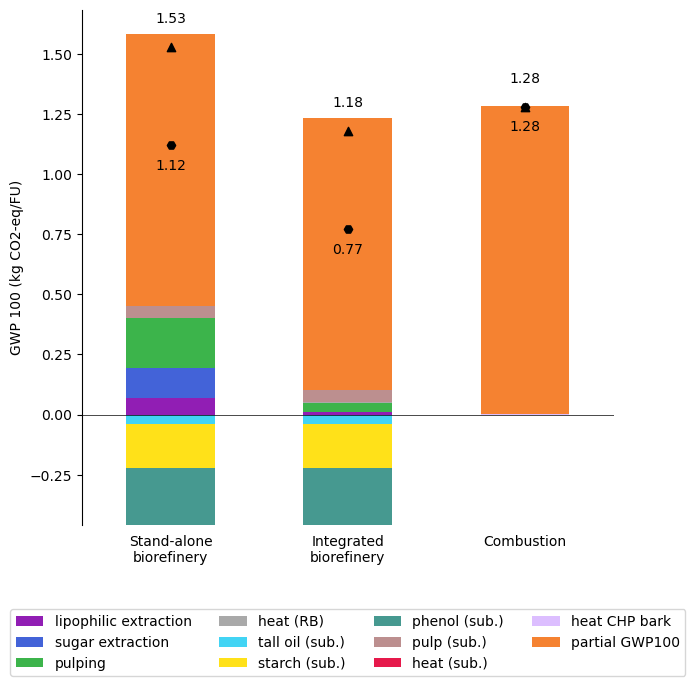

In [62]:
# transpose the dataframe
df_transposed = merged_df2.T

fig, ax = plt.subplots(figsize=(7, 7))
bars = df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_ylabel('GWP 100 (kg CO2-eq/FU)', fontsize=10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), title_fontsize='10', fontsize='10', ncol=4)

ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# add the single GWP100 scores for each scenario
categories_index = np.arange(len(new_names))
ax.scatter(categories_index, GWP_scores_wo_subst, color='black', marker = '^', zorder=5)
ax.scatter(categories_index, GWP_scores, color='black', marker = 'H', zorder=5)

for i, val in enumerate(GWP_scores):
    ax.text(categories_index[i], val - 0.1, f'{val}', ha='center', color='black')

for i, val in enumerate(GWP_scores_wo_subst):
    ax.text(categories_index[i], val + 0.1, f'{val}', ha='center', color='black')

plt.tight_layout()

plt.savefig('GWP100_results_SSP2_PkBudg500_2045.pdf', dpi=300)

plt.show()

# All impact categories calculations

The partial GWP100 scores are not added to the foreground databases. The calculations are done for the model without biogenic carbon, considering the Environmental Footprint (EF) LCIA methods. 

In [63]:
recipe_all = alg.findMethods('ReCiPe 2016 v1.03, midpoint (H)')
recipe = recipe_all[18:36] # remove all the "no LT" impact categories
recipe_noGWP = [ic for ic in recipe if 'climate change' not in ic]
len(recipe_noGWP)

17

In [64]:
# stand-alone biorefinery
df_bioref_standalone_allICs = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC,       
                             heat_residues,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub
                             ],
                             recipe_noGWP,
                            # parameters
                            standalone = 1,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_bioref_standalone_allICs

# doesn't include GWP100 partial (is 0 for all impact categories)

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
biorefinery,-0.00117544,0.127881,0.164111,5.05702,-0.0814999,0.000190948,-0.000405801,0.0444474,0.501347,0.000420527,-1.01726,0.0029622,-1.04879e-06,-1.18452e-05,-0.000481884,-0.000310475,-0.0360471
lipophilic extraction,0.000227531,0.0410253,0.050616,2.03062,0.0205274,3.11158e-05,4.11174e-06,0.0132392,0.224601,0.000128087,0.00862627,0.00126114,2.32605e-08,0.000112429,0.000337804,0.000436838,0.000740692
sugar extraction,0.00043274,0.0837898,0.103316,4.11312,0.0327862,5.70326e-05,9.02016e-06,0.0267308,0.44837,0.000262316,0.0161937,0.00255899,4.4483e-08,0.000217232,0.000375998,0.000401818,0.00125869
pulping,0.000340423,0.0193431,0.0242838,1.89828,0.0540405,5.06064e-05,1.08628e-05,0.00855432,0.205992,6.03317e-05,0.0309735,0.000699717,6.52112e-08,0.000190519,0.000311948,0.000340779,0.000811845
heat (RB),0.000471971,-0.003842,-0.00424,0.296721,-0.00107827,-2.30935e-07,-3.65867e-07,-0.00106689,0.133201,-1.57926e-05,-0.000905865,-7.28598e-07,1.92773e-07,0.000132818,0.000593702,0.000596309,0.000390037
tall oil (sub.),-0.00014008,-0.000841923,-0.00104569,-0.146051,-0.00592466,4.21007e-05,-5.09256e-05,-0.000907167,-0.0202176,1.39561e-05,-0.0239755,-5.89595e-05,-1.18088e-07,-7.00405e-05,-7.04432e-05,-7.73768e-05,-0.00109384
starch (sub.),-0.00185378,-0.0132582,-0.0104217,-1.82389,-0.0468007,-7.41624e-05,-0.000406929,-0.00317799,-0.419417,-2.92781e-05,-0.192536,-0.00102358,-1.15539e-06,-0.000363687,-0.000688699,-0.000716508,-0.0343156
phenol (sub.),-0.000412733,-0.00231107,-0.00291179,-0.476043,-0.145004,-2.06544e-06,-2.19575e-07,-0.00355591,-0.0483513,1.483e-05,-0.000628733,-0.000123665,-1.73285e-08,-0.000136421,-0.000231377,-0.000163612,-0.00432144
pulp (sub.),0.000230454,0.000134387,0.00027497,-0.539007,0.00887577,8.63201e-05,2.82789e-05,0.00356415,0.11037,-2.97159e-05,-0.855917,-0.000351437,1.09061e-07,3.81236e-05,-0.000517115,-0.000532413,0.000872553
heat (sub.),-0.000471971,0.003842,0.00424,-0.296721,0.00107827,2.30935e-07,3.65867e-07,0.00106689,-0.133201,1.57926e-05,0.000905865,7.28598e-07,-1.92773e-07,-0.000132818,-0.000593702,-0.000596309,-0.000390037


In [65]:
# integrated biorefinery
df_bioref_integrated_allICs = alg.compute_impacts([biorefinery_model,
                             lipophilic_extraction, sugar_extraction, pulping,
                             #processA, processB, processC, 
                             heat_residues,
                             talloil_sub, starch_sub, phenol_sub, pulp_sub, heat_sub],
                             recipe_noGWP,
                            # parameters
                            standalone = 0,
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_bioref_integrated_allICs

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
biorefinery,-0.00202247,-0.0157958,-0.0133288,-2.84165,-0.174953,7.17066e-05,-0.000425029,-0.00300022,-0.332467,-3.87694e-05,-1.04977,-0.00150576,-1.14897e-06,-0.000423293,-0.00125653,-0.00114249,-0.0386763
lipophilic extraction,1.63921e-05,0.000138325,0.000201062,0.0235552,0.00452953,3.39685e-06,2.26725e-07,0.000195398,0.00611899,7.83036e-08,0.000723392,1.24409e-05,1.70426e-09,6.42895e-06,0.000154352,0.000240788,0.00012659
sugar extraction,7.88672e-08,4.91729e-06,6.52003e-06,0.000285363,3.65537e-06,2.31404e-07,1.05905e-06,1.76849e-06,0.000659766,3.50413e-09,-6.91678e-07,1.80114e-07,3.10272e-10,1.94157e-08,7.1897e-08,7.54492e-08,2.81546e-07
pulping,0.000137199,0.00033771,0.000567822,0.119506,0.00936791,1.58853e-05,3.48095e-06,0.000879537,0.038371,-8.6433e-06,0.0225641,3.92647e-05,3.07549e-08,0.000102284,9.66762e-05,0.000106561,5.51619e-05
heat (RB),0.000471971,-0.003842,-0.00424,0.296721,-0.00107827,-2.30935e-07,-3.65867e-07,-0.00106689,0.133201,-1.57926e-05,-0.000905865,-7.28598e-07,1.92773e-07,0.000132818,0.000593702,0.000596309,0.000390037
tall oil (sub.),-0.00014008,-0.000841923,-0.00104569,-0.146051,-0.00592466,4.21007e-05,-5.09256e-05,-0.000907167,-0.0202176,1.39561e-05,-0.0239755,-5.89595e-05,-1.18088e-07,-7.00405e-05,-7.04432e-05,-7.73768e-05,-0.00109384
starch (sub.),-0.00185378,-0.0132582,-0.0104217,-1.82389,-0.0468007,-7.41624e-05,-0.000406929,-0.00317799,-0.419417,-2.92781e-05,-0.192536,-0.00102358,-1.15539e-06,-0.000363687,-0.000688699,-0.000716508,-0.0343156
phenol (sub.),-0.000412733,-0.00231107,-0.00291179,-0.476043,-0.145004,-2.06544e-06,-2.19575e-07,-0.00355591,-0.0483513,1.483e-05,-0.000628733,-0.000123665,-1.73285e-08,-0.000136421,-0.000231377,-0.000163612,-0.00432144
pulp (sub.),0.000230454,0.000134387,0.00027497,-0.539007,0.00887577,8.63201e-05,2.82789e-05,0.00356415,0.11037,-2.97159e-05,-0.855917,-0.000351437,1.09061e-07,3.81236e-05,-0.000517115,-0.000532413,0.000872553
heat (sub.),-0.000471971,0.003842,0.00424,-0.296721,0.00107827,2.30935e-07,3.65867e-07,0.00106689,-0.133201,1.57926e-05,0.000905865,7.28598e-07,-1.92773e-07,-0.000132818,-0.000593702,-0.000596309,-0.000390037


In [66]:
df_combustion_allICs = alg.compute_impacts([combustion_model,
                            heat_CHP_bark_scaled,
                            ],
                            recipe_noGWP,
                            # parameters
                            percentage_losses = 0,
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
df_combustion_allICs

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
combustion,0.00117993,-0.00960501,-0.0106,0.741803,-0.00269568,-5.77337e-07,-9.14666e-07,-0.00266722,0.333003,-3.94815e-05,-0.00226466,-1.8215e-06,4.81933e-07,0.000332046,0.00148425,0.00149077,0.000975092
heat CHP bark,0.00117993,-0.00960501,-0.0106,0.741803,-0.00269568,-5.77337e-07,-9.14666e-07,-0.00266722,0.333003,-3.94815e-05,-0.00226466,-1.8215e-06,4.81933e-07,0.000332046,0.00148425,0.00149077,0.000975092


### Export table aggregated values for each scenario

In [67]:
df_bioref_standalone_allICs

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
biorefinery,-0.00117544,0.127881,0.164111,5.05702,-0.0814999,0.000190948,-0.000405801,0.0444474,0.501347,0.000420527,-1.01726,0.0029622,-1.04879e-06,-1.18452e-05,-0.000481884,-0.000310475,-0.0360471
lipophilic extraction,0.000227531,0.0410253,0.050616,2.03062,0.0205274,3.11158e-05,4.11174e-06,0.0132392,0.224601,0.000128087,0.00862627,0.00126114,2.32605e-08,0.000112429,0.000337804,0.000436838,0.000740692
sugar extraction,0.00043274,0.0837898,0.103316,4.11312,0.0327862,5.70326e-05,9.02016e-06,0.0267308,0.44837,0.000262316,0.0161937,0.00255899,4.4483e-08,0.000217232,0.000375998,0.000401818,0.00125869
pulping,0.000340423,0.0193431,0.0242838,1.89828,0.0540405,5.06064e-05,1.08628e-05,0.00855432,0.205992,6.03317e-05,0.0309735,0.000699717,6.52112e-08,0.000190519,0.000311948,0.000340779,0.000811845
heat (RB),0.000471971,-0.003842,-0.00424,0.296721,-0.00107827,-2.30935e-07,-3.65867e-07,-0.00106689,0.133201,-1.57926e-05,-0.000905865,-7.28598e-07,1.92773e-07,0.000132818,0.000593702,0.000596309,0.000390037
tall oil (sub.),-0.00014008,-0.000841923,-0.00104569,-0.146051,-0.00592466,4.21007e-05,-5.09256e-05,-0.000907167,-0.0202176,1.39561e-05,-0.0239755,-5.89595e-05,-1.18088e-07,-7.00405e-05,-7.04432e-05,-7.73768e-05,-0.00109384
starch (sub.),-0.00185378,-0.0132582,-0.0104217,-1.82389,-0.0468007,-7.41624e-05,-0.000406929,-0.00317799,-0.419417,-2.92781e-05,-0.192536,-0.00102358,-1.15539e-06,-0.000363687,-0.000688699,-0.000716508,-0.0343156
phenol (sub.),-0.000412733,-0.00231107,-0.00291179,-0.476043,-0.145004,-2.06544e-06,-2.19575e-07,-0.00355591,-0.0483513,1.483e-05,-0.000628733,-0.000123665,-1.73285e-08,-0.000136421,-0.000231377,-0.000163612,-0.00432144
pulp (sub.),0.000230454,0.000134387,0.00027497,-0.539007,0.00887577,8.63201e-05,2.82789e-05,0.00356415,0.11037,-2.97159e-05,-0.855917,-0.000351437,1.09061e-07,3.81236e-05,-0.000517115,-0.000532413,0.000872553
heat (sub.),-0.000471971,0.003842,0.00424,-0.296721,0.00107827,2.30935e-07,3.65867e-07,0.00106689,-0.133201,1.57926e-05,0.000905865,7.28598e-07,-1.92773e-07,-0.000132818,-0.000593702,-0.000596309,-0.000390037


In [68]:
df_bioref_standalone_allICs_table = df_bioref_standalone_allICs.drop(df_bioref_standalone_allICs.index[1:11])
df_bioref_standalone_allICs_table = df_bioref_standalone_allICs_table.rename(index = {'biorefinery': 'stand-alone biorefinery'})

In [69]:
df_bioref_standalone_allICs_table

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
stand-alone biorefinery,-0.00117544,0.127881,0.164111,5.05702,-0.0814999,0.000190948,-0.000405801,0.0444474,0.501347,0.000420527,-1.01726,0.0029622,-1.04879e-06,-1.18452e-05,-0.000481884,-0.000310475,-0.0360471


In [70]:
df_bioref_integrated_allICs_table = df_bioref_integrated_allICs.drop(df_bioref_integrated_allICs.index[1:11])
df_bioref_integrated_allICs_table = df_bioref_integrated_allICs_table.rename(index = {'biorefinery': 'integrated biorefinery'})

In [71]:
df_combustion_allICs_table = df_combustion_allICs.drop(df_combustion_allICs.index[1:2])
df_combustion_allICs_table

,acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]","ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]","ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]","energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]","human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],land use - agricultural land occupation (LOP)[m2*a crop-Eq],material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq],ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq],particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq],photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq],photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq],water use - water consumption potential (WCP)[cubic meter]
combustion,0.00117993,-0.00960501,-0.0106,0.741803,-0.00269568,-5.77337e-07,-9.14666e-07,-0.00266722,0.333003,-3.94815e-05,-0.00226466,-1.8215e-06,4.81933e-07,0.000332046,0.00148425,0.00149077,0.000975092


In [72]:
merged_df_table = pd.concat([df_bioref_standalone_allICs_table, df_bioref_integrated_allICs_table, df_combustion_allICs_table], axis = 0)
merged_df_table_transposed = merged_df_table.T
merged_df_table_transposed

,stand-alone biorefinery,integrated biorefinery,combustion
acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq],-0.00117544,-0.00202247,0.00117993
"ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]",0.127881,-0.0157958,-0.00960501
"ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]",0.164111,-0.0133288,-0.0106
"ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]",5.05702,-2.84165,0.741803
"energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]",-0.0814999,-0.174953,-0.00269568
eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq],0.000190948,7.17066e-05,-5.77337e-07
eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq],-0.000405801,-0.000425029,-9.14666e-07
"human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]",0.0444474,-0.00300022,-0.00266722
"human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]",0.501347,-0.332467,0.333003
ionising radiation - ionising radiation potential (IRP)[kg Co-60-Eq],0.000420527,-3.87694e-05,-3.94815e-05


In [73]:
merged_df_table_transposed.to_excel("aggregated_scores_ei39.xlsx")

### Plot graphs for a few impact categories

In [74]:
ic_dict = {
    'particulate matter formation':  {'name': 'particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq]',
                                                 'unit': 'kg PM2.5-Eq',
                                                 'abbrev': 'PMFP'},
    'human toxicity potential, carcinogenics':  {'name': 'human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]',
                                                 'unit': 'kg 1,4-DCB-Eq',
                                                 'abbrev': 'HTPc'},
    'freshwater eutrophication potential': {'name': 'eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq]',
                                                 'unit': 'kg P-Eq',
                                                 'abbrev': 'FEP'},
    'ozone depletion potential' : {'name': 'ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq]',
                                                 'unit': 'kg CFC-11-Eq',
                                                 'abbrev': 'ODP'},
    'surplus ore potential' : {'name': 'material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq]',
                                                 'unit': 'kg Cu-Eq',
                                                 'abbrev': 'SOP'},
    'terrestrial acidification potential' : {'name': 'acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq]',
                                                 'unit': 'kg SO2-Eq',
                                                 'abbrev': 'TAP'},
    'water consumption potential' : {'name': 'water use - water consumption potential (WCP)[cubic meter]',
                                                 'unit': 'm3-Eq',
                                                 'abbrev': 'WCP'}
}

In [77]:
def plot_ic (ic_name):

    # get the data
    name = ic_dict[ic_name]['name']
    df_ic_col_bioref_standalone = pd.DataFrame({'Stand-alone\nbiorefinery': df_bioref_standalone_allICs[name]})
    df_ic_col_bioref_standalone_vf = df_ic_col_bioref_standalone.drop(df_ic_col_bioref_standalone.index[0])
    df_ic_col_bioref_integrated = pd.DataFrame({'Integrated\nbiorefinery': df_bioref_integrated_allICs[name]})
    df_ic_col_bioref_integrated_vf = df_ic_col_bioref_integrated.drop(df_ic_col_bioref_integrated.index[0])
    df_ic_col_combustion = pd.DataFrame({'Combustion': df_combustion_allICs[name]})
    df_ic_col_combustion_vf = df_ic_col_combustion.drop(df_ic_col_combustion.index[0])
    merged_df_table = pd.concat([df_ic_col_bioref_standalone_vf, df_ic_col_bioref_integrated_vf, df_ic_col_combustion_vf], axis = 1)
    merged_df_table = merged_df_table.rename(columns={'Stand-alone\nbiorefinery': 'Sta.', 'Integrated\nbiorefinery': 'Int.', 'Combustion': 'Com.'})
    
    # get the total scores
    total_scores = list(merged_df_table.sum())
    total_scores = ['%.4f' % elem for elem in total_scores]
    total_scores = [float(elem) for elem in total_scores] # the list items must be floats
    
    # plot the graph
    ic_abbrev = ic_dict[ic_name]['abbrev']
    ic_unit = ic_dict[ic_name]['unit']
    
    df_transposed = merged_df_table.T
    
    fig, ax = plt.subplots(figsize=(3, 3))
    bars = df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors, legend=False)
    ax.set_ylabel(str(ic_abbrev + ' (' +ic_unit+')'), fontsize=10)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), title_fontsize='10', fontsize='10', ncol=4)
    
    ax.tick_params(axis='x', labelsize=10, rotation=0)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # add the single GWP100 scores for each scenario
    categories_index = np.arange(len(new_names))
    ax.scatter(categories_index, total_scores, color='black', marker = 'H', zorder=5)
    
    #for i, val in enumerate(total_scores):
        #ax.text(categories_index[i], val + val*0.1, f'{val}', ha='center', color='black')
    
    plt.tight_layout()
    
    plt.savefig(str(ic_abbrev+'_results_SSP2_PkBudg500_2045.pdf'), dpi=300)
    
    plt.show()

    return

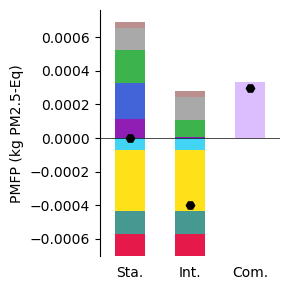

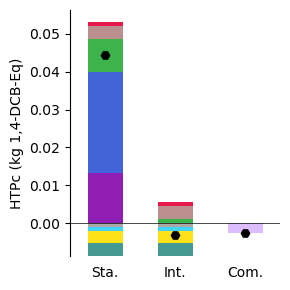

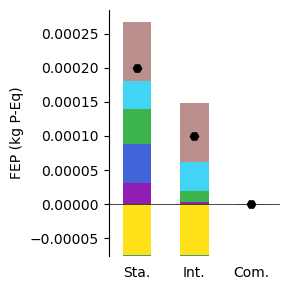

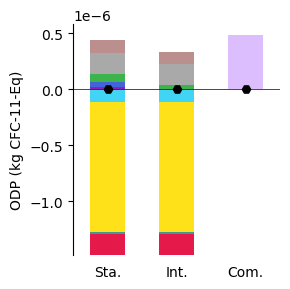

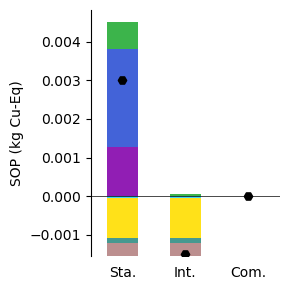

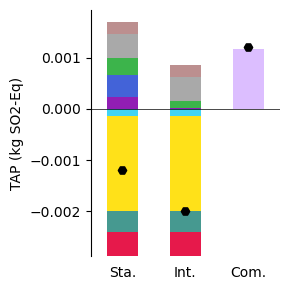

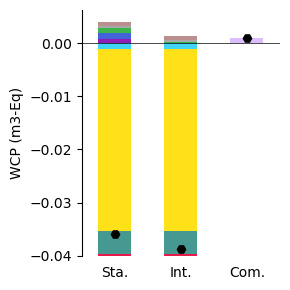

In [78]:
for ic in ic_dict.keys():
    plot_ic (ic)

# Sensitivity analysis - biomass losses

In [79]:
df_bioref_standalone_sensitivity = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 1,
                                    percentage_losses = np.arange(-1, 1, 0.1),
                                    grid_loc = 'grid_SE',
                                    mw_loc = 'mw_SE'
                                    )
#df_bioref_standalone_sensitivity = df_bioref_standalone_sensitivity.drop(df_bioref_standalone_sensitivity.index[0])

In [80]:
df_bioref_integrated_sensitivity = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 0,
                                    percentage_losses = np.arange(-1, 1, 0.1),
                                    grid_loc = 'grid_SE',
                                    mw_loc = 'mw_SE'
                                    )
#df_bioref_integrated_sensitivity = df_bioref_integrated_sensitivity.drop(df_bioref_integrated_sensitivity.index[0])

In [81]:
df_combustion_sensitivity = alg.compute_impacts([combustion_model],
                            [ipcc2021],
                            # parameters
                            percentage_losses = np.arange(-1, 1, 0.1),
                            grid_loc = 'grid_SE',
                            mw_loc = 'mw_SE'
                            )
#df_combustion_sensitivity = df_combustion_sensitivity.drop(df_combustion_sensitivity.index[0])

In [82]:
percentage_losses = pd.DataFrame(data = np.arange(-1, 1, 0.1), columns = ['Losses'])

In [83]:
merged_df_sensitivity = pd.concat([percentage_losses, df_bioref_standalone_sensitivity, df_bioref_integrated_sensitivity, df_combustion_sensitivity], axis = 1)
merged_df_sensitivity.set_index('Losses')

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq]
Losses,,,
-1,NaN,NaN,NaN
-0.9,0.758167,0.408203,1.28162
-0.8,0.798765,0.448801,1.28162
-0.7,0.839363,0.489399,1.28162
-0.6,0.879961,0.529997,1.28162
-0.5,0.92056,0.570596,1.28162
-0.4,0.961158,0.611194,1.28162
-0.3,1.00176,0.651792,1.28162
-0.2,1.04235,0.69239,1.28162


In [84]:
# change the column names
new_names = ['Losses','Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df_sensitivity.columns = new_names
merged_df_sensitivity.set_index('Losses')

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
Losses,,,
-1,NaN,NaN,NaN
-0.9,0.758167,0.408203,1.28162
-0.8,0.798765,0.448801,1.28162
-0.7,0.839363,0.489399,1.28162
-0.6,0.879961,0.529997,1.28162
-0.5,0.92056,0.570596,1.28162
-0.4,0.961158,0.611194,1.28162
-0.3,1.00176,0.651792,1.28162
-0.2,1.04235,0.69239,1.28162


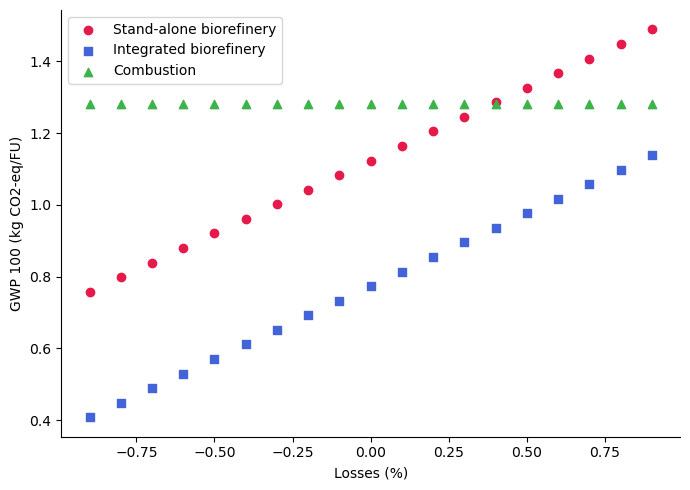

In [85]:
# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(merged_df_sensitivity['Losses'], merged_df_sensitivity['Stand-alone\nbiorefinery'], label='Stand-alone biorefinery', marker='o', color = '#e6194B')
plt.scatter(merged_df_sensitivity['Losses'], merged_df_sensitivity['Integrated\nbiorefinery'], label='Integrated biorefinery', marker='s', color = '#4363d8')
plt.scatter(merged_df_sensitivity['Losses'], merged_df_sensitivity['Combustion'], label='Combustion', marker='^', color = '#3cb44b')

# Adding titles and labels
plt.xlabel('Losses (%)')
plt.ylabel('GWP 100 (kg CO2-eq/FU)')
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

    
plt.tight_layout()
plt.savefig('sensitivity_losses_SSP2_PkBudg500_2045.pdf')

# Show plot
plt.show()

# Sensitivity analysis - geographical location

In [86]:
grid_list = ['grid_SE', 'grid_NO', 'grid_FI', 'grid_DK', 'grid_FR', 'grid_DE', 'grid_BE', 'grid_LU', 'grid_NL', 'grid_AT', 'grid_RER']
mw_list = ['mw_SE', 'mw_NO', 'mw_FI', 'mw_DK', 'mw_FR', 'mw_DE', 'mw_BE', 'mw_LU', 'mw_NL', 'mw_AT', 'mw_RER']
countries = ['SE','NO', 'FI', 'DK', 'FR', 'DE', 'BE', 'LU', 'NL', 'AT', 'RER']

In [87]:
df_bioref_standalone_sensitivity_loc = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 1,
                                    percentage_losses = 0,
                                    grid_loc = grid_list,
                                    mw_loc = mw_list
                                    )
df_bioref_standalone_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,1.12355
grid_NO,mw_NO,1.15978
grid_FI,mw_FI,1.12355
grid_DK,mw_DK,1.12355
grid_FR,mw_FR,1.12355
grid_DE,mw_DE,1.12355
grid_BE,mw_BE,1.12355
grid_LU,mw_LU,1.12355
grid_NL,mw_NL,1.12355


In [88]:
df_bioref_integrated_sensitivity_loc = alg.compute_impacts([biorefinery_model],
                                    [ipcc2021],
                                    # parameters
                                    standalone = 0,
                                    percentage_losses = 0,
                                    grid_loc = grid_list,
                                    mw_loc = mw_list
                                    )
df_bioref_integrated_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,0.773587
grid_NO,mw_NO,0.773587
grid_FI,mw_FI,0.773587
grid_DK,mw_DK,0.773587
grid_FR,mw_FR,0.773587
grid_DE,mw_DE,0.773587
grid_BE,mw_BE,0.773587
grid_LU,mw_LU,0.773587
grid_NL,mw_NL,0.773587


In [89]:
df_combustion_sensitivity_loc = alg.compute_impacts([combustion_model],
                            [ipcc2021],
                            # parameters
                            percentage_losses = 0,
                            grid_loc = grid_list,
                            mw_loc = mw_list
                            )
df_combustion_sensitivity_loc

,,climate change - global warming potential (GWP100)[kg CO2-Eq]
grid_loc,mw_loc,
grid_SE,mw_SE,1.28162
grid_NO,mw_NO,1.27826
grid_FI,mw_FI,1.28162
grid_DK,mw_DK,1.28162
grid_FR,mw_FR,1.28164
grid_DE,mw_DE,1.28162
grid_BE,mw_BE,1.28162
grid_LU,mw_LU,1.28164
grid_NL,mw_NL,1.28162


In [90]:
merged_df_sensitivity_loc = pd.concat([df_bioref_standalone_sensitivity_loc, df_bioref_integrated_sensitivity_loc, df_combustion_sensitivity_loc], axis=1)

In [91]:
new_names = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']
merged_df_sensitivity_loc.columns = new_names
merged_df_sensitivity_loc

,,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
grid_loc,mw_loc,,,
grid_SE,mw_SE,1.12355,0.773587,1.28162
grid_NO,mw_NO,1.15978,0.773587,1.27826
grid_FI,mw_FI,1.12355,0.773587,1.28162
grid_DK,mw_DK,1.12355,0.773587,1.28162
grid_FR,mw_FR,1.12355,0.773587,1.28164
grid_DE,mw_DE,1.12355,0.773587,1.28162
grid_BE,mw_BE,1.12355,0.773587,1.28162
grid_LU,mw_LU,1.12355,0.773587,1.28164
grid_NL,mw_NL,1.12355,0.773587,1.28162


In [92]:
merged_df_sensitivity_loc = merged_df_sensitivity_loc.reset_index(drop=True)
merged_df_sensitivity_loc = merged_df_sensitivity_loc.set_index([countries])

In [93]:
merged_df_sensitivity_loc

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
SE,1.12355,0.773587,1.28162
NO,1.15978,0.773587,1.27826
FI,1.12355,0.773587,1.28162
DK,1.12355,0.773587,1.28162
FR,1.12355,0.773587,1.28164
DE,1.12355,0.773587,1.28162
BE,1.12355,0.773587,1.28162
LU,1.12355,0.773587,1.28164
NL,1.12355,0.773587,1.28162
AT,1.12355,0.773587,1.28162


In [94]:
merged_df_sensitivity_loc.index

Index(['SE', 'NO', 'FI', 'DK', 'FR', 'DE', 'BE', 'LU', 'NL', 'AT', 'RER'], dtype='object')

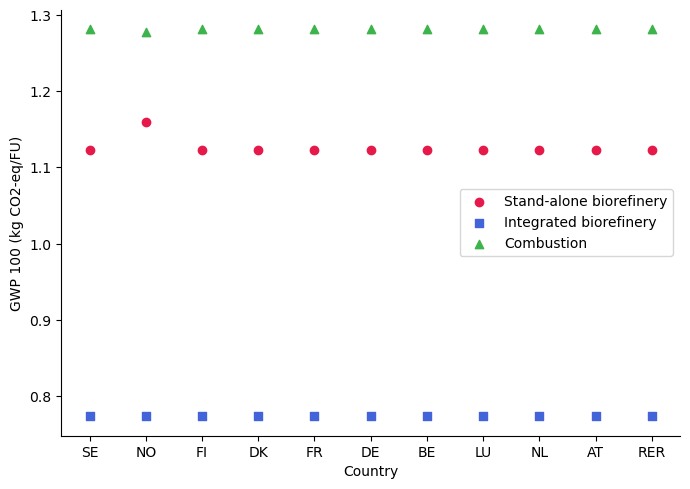

In [95]:
# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Stand-alone\nbiorefinery'], label='Stand-alone biorefinery', marker='o', color = '#e6194B')
plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Integrated\nbiorefinery'], label='Integrated biorefinery', marker='s', color = '#4363d8')
plt.scatter(merged_df_sensitivity_loc.index, merged_df_sensitivity_loc['Combustion'], label='Combustion', marker='^', color = '#3cb44b')

# Adding titles and labels
plt.xlabel('Country')
plt.ylabel('GWP 100 (kg CO2-eq/FU)')
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

    
plt.tight_layout()
plt.savefig('sensitivity_loc_SSP2_PkBudg500_2045.pdf')

# Show plot
plt.show()

# Sensitivity analysis - lifespan biorefinery products

## Data interpolation

The characterisation factors for CO2 100 years time horizon are extracted from the ALIGNED tool. The data are plotted per year and interpolated. 

In [96]:
df = pd.read_excel('sensitivity_GWP100_lifespan.xlsx')

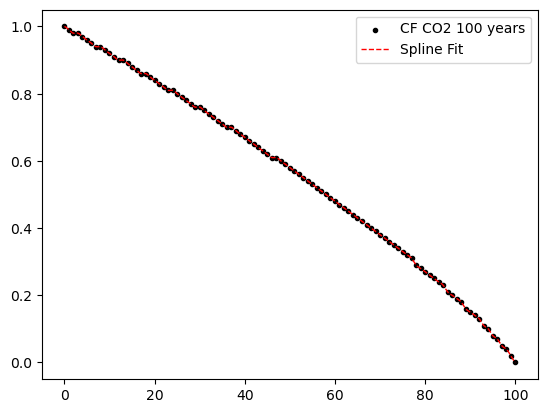

In [97]:
from scipy.interpolate import interp1d

x = df.index
y = df['CF_CO2']
f = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 100, num=100001, endpoint=True)


plt.scatter(x, y, marker = '.',label = 'CF CO2 100 years',color = 'black',zorder=1)
plt.plot(xnew, f(xnew), '--',lw = 1, label = 'Spline Fit',color = 'red',zorder=2)


plt.legend()
plt.show()

## Amount of CO2 in each biorefinery product

The amounts of CO2 are fixed. However, an increase in losses in the biorefinery processes would lead to a reduction of the amount of CO2 from the main products and an increase in the amount of CO2 from the residual biomass. Here, the losses are fixed to 0 (i.e. one-at-a-time sensitivity).

In [98]:
# amount of CO2 (kg CO2-eq/FU)
amount_CO2_talloil = 15.20*44/12/1000
amount_CO2_starch = 48.39*44/12/1000
amount_CO2_phenol = 110.1*44/12/1000
amount_CO2_pulp = 234.1*44/12/1000
amount_CO2_RB = (34.20 + 8.808 + 35.50)*44/12/1000
amount_CO2_CHP_bark = 486.3*44/12/1000

## Temporality of the CO2 emissions

In [99]:
# percentage of change of the lifespan of the biorefinery products
percentage_change = 0

In [100]:
# year at which the processing of bark occurs
year_zero = 35 

In [101]:
def partial_GWP100 (percentage_change, year_zero):

    # lifespan of the products
    lifespan_CHP_bark = 0 # the bark is assumed to be always burnt on year 1
    lifespan_RB = 0 + 0*percentage_change
    lifespan_talloil = 1 + 1*percentage_change
    lifespan_starch_cardboard = 1 + 1*percentage_change
    lifespan_pulp_biomed = 1 + 1*percentage_change
    lifespan_pulp_textile = 5 + 5*percentage_change
    lifespan_pulp_nanocomposite = 20 + 20*percentage_change
    lifespan_phenol_electronics = 7 + 7*percentage_change
    lifespan_phenol_auto = 13 + 13*percentage_change
    lifespan_phenol_furniture = 15 + 15*percentage_change
    lifespan_phenol_construction = 50 + 50*percentage_change
    lifespan_phenol_others = 21.25 + 21.25*percentage_change

    # years of direct CO2 emissions
    year_emission_bark = year_zero+lifespan_RB
    year_emission_RB = year_zero+lifespan_RB
    year_emission_talloil = year_zero+lifespan_talloil
    year_emission_starch_carboard = year_zero+lifespan_starch_cardboard
    year_emission_pulp_biomed = year_zero+lifespan_pulp_biomed
    year_emission_pulp_textile = year_zero+lifespan_pulp_textile
    year_emission_pulp_nanocomposite = year_zero+lifespan_pulp_nanocomposite
    year_emission_phenol_electronics = year_zero+lifespan_phenol_electronics
    year_emission_phenol_auto = year_zero+lifespan_phenol_auto
    year_emission_phenol_furniture = year_zero+lifespan_phenol_furniture
    year_emission_phenol_construction = year_zero+lifespan_phenol_construction
    year_emission_phenol_others = year_zero+lifespan_phenol_others

    # amount of CO2 emitted
    amount_emission_bark = amount_CO2_CHP_bark
    amount_emission_RB = amount_CO2_RB
    amount_emission_talloil = amount_CO2_talloil
    amount_emission_starch_carboard = amount_CO2_starch
    amount_emission_pulp_biomed = 1/3*amount_CO2_pulp
    amount_emission_pulp_textile = 1/3*amount_CO2_pulp
    amount_emission_pulp_nanocomposite = 1/3*amount_CO2_pulp
    amount_emission_phenol_electronics = 0.14*amount_CO2_phenol
    amount_emission_phenol_auto = 0.4*amount_CO2_phenol
    amount_emission_phenol_furniture = 0.18*amount_CO2_phenol
    amount_emission_phenol_construction = 0.23*amount_CO2_phenol
    amount_emission_phenol_others = 0.05*amount_CO2_phenol

    # calculation partial GWP100
    GWP_bark = f(year_emission_bark)*amount_emission_bark
    GWP_RB = f(year_emission_RB)*amount_emission_RB
    GWP_talloil = f(year_emission_talloil)*amount_emission_talloil
    GWP_starch_cardboard = f(year_emission_starch_carboard)*amount_emission_starch_carboard
    GWP_pulp_biomed = f(year_emission_pulp_biomed)*amount_emission_pulp_biomed
    GWP_pulp_textile = f(year_emission_pulp_textile)*amount_emission_pulp_textile
    GWP_pulp_nanocomposite = f(year_emission_pulp_nanocomposite)*amount_emission_pulp_nanocomposite
    GWP_phenol_electronics = f(year_emission_phenol_electronics)*amount_emission_phenol_electronics
    GWP_phenol_auto = f(year_emission_phenol_auto)*amount_emission_phenol_auto
    GWP_phenol_furniture = f(year_emission_phenol_furniture)*amount_emission_phenol_furniture
    GWP_phenol_construction = f(year_emission_phenol_construction)*amount_emission_phenol_construction
    GWP_phenol_others = f(year_emission_phenol_others)*amount_emission_phenol_others

    partial_GWP_bioref = GWP_RB + GWP_talloil + GWP_starch_cardboard + GWP_pulp_biomed + GWP_pulp_textile + GWP_pulp_nanocomposite + GWP_phenol_electronics + GWP_phenol_auto + GWP_phenol_furniture + GWP_phenol_construction +  GWP_phenol_others
    partial_GWP_combustion = GWP_bark

    # plot the emissions vs year + straight line for GWP100  (replace excel plot)    

    return partial_GWP_bioref, partial_GWP_combustion

In [102]:
partial_GWP_bioref, partial_GWP_combustion = partial_GWP100 (percentage_change, year_zero)

In [103]:
### plot sensitivity graph GWP100 for different values of percentage change
percentage_change_list = np.arange(0, 0.3,0.01).tolist()
partial_GWP_bioref_list = []
partial_GWP_combustion_list = []

for value in percentage_change_list:
    partial_GWP_bioref, partial_GWP_combustion = partial_GWP100 (value, year_zero)
    partial_GWP_bioref_list.append(partial_GWP_bioref)
    partial_GWP_combustion_list.append(partial_GWP_combustion)

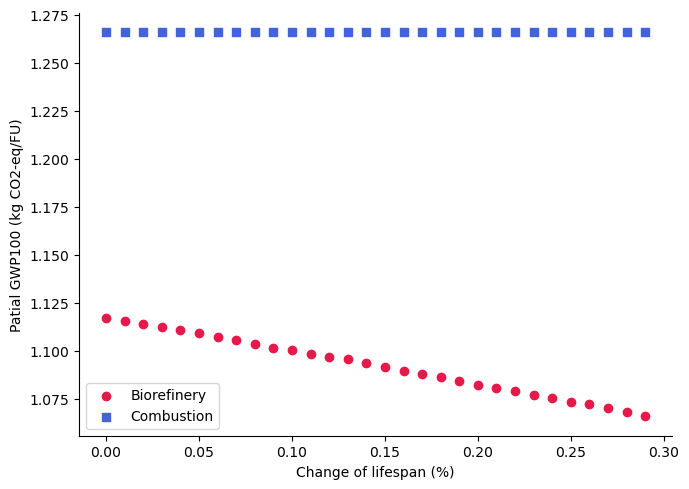

In [104]:
# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(percentage_change_list, partial_GWP_bioref_list, label='Biorefinery', marker='o', color = '#e6194B')
plt.scatter(percentage_change_list, partial_GWP_combustion_list, label='Combustion', marker='s', color = '#4363d8')


# Adding titles and labels
plt.xlabel('Change of lifespan (%)')
plt.ylabel('Patial GWP100 (kg CO2-eq/FU)')
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

    
plt.tight_layout()
plt.savefig('sensitivity_lifespan_SSP2_PkBudg500_2045.pdf')

# Show plot
plt.show()